
'series通过索引进行排序：'

series.sort_index()

'series通过值进行排序:'

series.sort_values()

'dataframe根据行索引进行降序排序（排序时默认升序，调节ascending参数）：'

frame.sort_index(ascending=False)

'dataframe根据列索引进行排序：'

frame.sort_index(axis=1)

'dataframe根据值进行排序：'

frame.sort_values(by='a')

'通过多个索引进行排序：'



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
Mig = pd.read_csv('../data/' + 'MissingMigrants-Global-2019-03-29T18-36-07.csv')

In [65]:
MonList = []
for index,row in Mig.iterrows():
    if row['Reported Month'] == 'Jan':
        MonList.append(1)
    elif row['Reported Month'] == 'Feb':
        MonList.append(2)
    elif row['Reported Month'] == 'Mar':
        MonList.append(3)
    elif row['Reported Month'] == 'Apr':
        MonList.append(4)
    elif row['Reported Month'] == 'May':
        MonList.append(5)
    elif row['Reported Month'] == 'Jun':
        MonList.append(6)
    elif row['Reported Month'] == 'Jul':
        MonList.append(7)
    elif row['Reported Month'] == 'Aug':
        MonList.append(8)
    elif row['Reported Month'] == 'Sep':
        MonList.append(9)
    elif row['Reported Month'] == 'Oct':
        MonList.append(10)
    elif row['Reported Month'] == 'Nov':
        MonList.append(11)
    elif row['Reported Month'] == 'Dec':
        MonList.append(12)
    else:
        continue

In [ ]:
Mig['MonList'] = MonList  # add num of Month , easy to sort

In [37]:
MigDeath = Mig.groupby(by = ["Reported Month","Reported Year"]).sum().sort_values(by = 'Total Dead and Missing')[["Minimum Estimated Number of Missing",'Total Dead and Missing','Number of Survivors','Number Dead']]
MigDeath.to_csv('brige.csv')
MigDeath = pd.read_csv('brige.csv')
MigDeath = MigDeath.sort_values(by = "NumMonth")

In [49]:
MigDeath

,Reported Month,Reported Year,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number Dead,NumMonth
0,Jan,2014,0.0,27,4.0,27.0,1
38,Jan,2018,222.0,511,847.0,289.0,1
18,Jan,2019,197.0,343,651.0,146.0,1
41,Jan,2017,247.0,562,739.0,315.0,1
9,Jan,2015,107.0,209,669.0,102.0,1
...,...,...,...,...,...,...,...
49,Dec,2015,102.0,705,1355.0,603.0,12
47,Dec,2016,291.0,701,1128.0,410.0,12
57,Dec,2014,818.0,918,126.0,100.0,12
6,Dec,2018,62.0,179,430.0,117.0,12


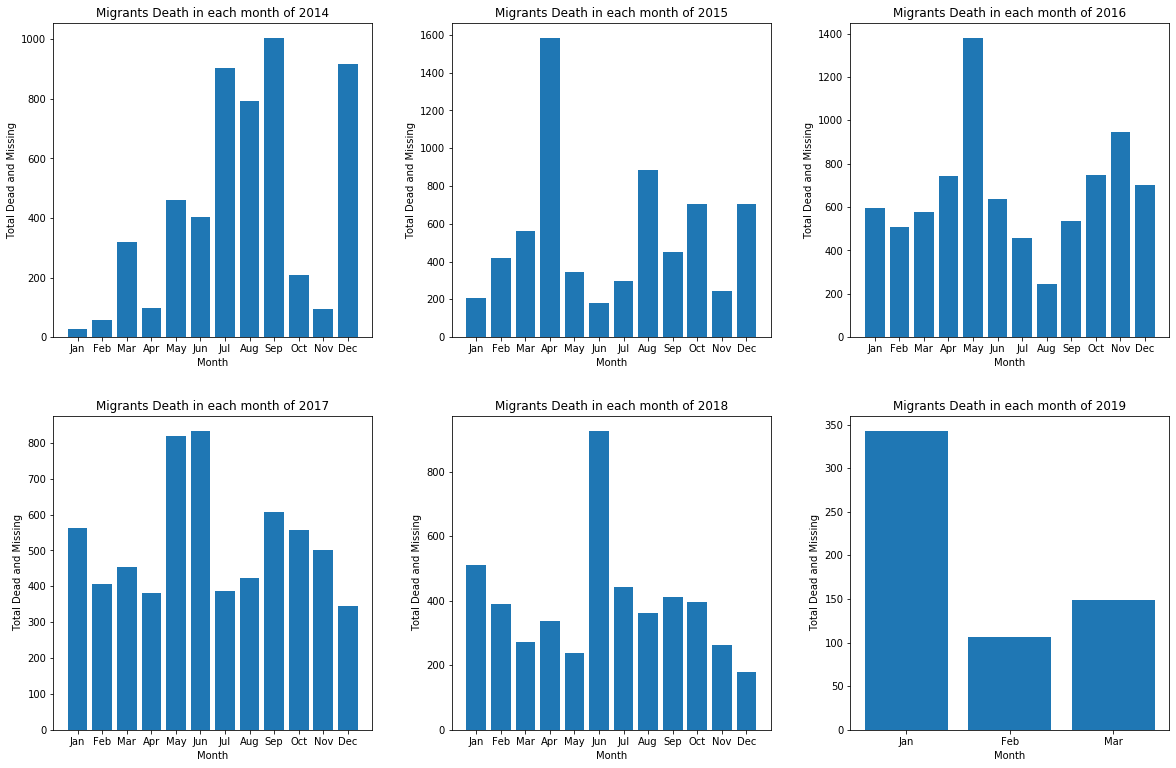

In [67]:
MigDeath_Draw = MigDeath.groupby(by = 'Reported Year').size()

fig = plt.figure(figsize=(20,13)) #create a new figure 
fig.subplots_adjust(hspace=0.25,wspace = 0.25)  # gaps between the figures 
n = 1 
for year in MigDeath_Draw.index:
    ax = fig.add_subplot(2,3,n)
    ax.set_title('Migrants Death in each month of ' + str(year))
    x = MigDeath[MigDeath['Reported Year'] == year]['Reported Month']
    y = MigDeath[MigDeath['Reported Year'] == year]['Total Dead and Missing']
    ax.bar(x,y)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Dead and Missing')
    #plt.xticks(rotation = 90) 
    n += 1

plt.show();

In [ ]:
Mig.head(5)

In [68]:
GroupBySum = Mig.groupby('Cause of Death').sum()

In [69]:
GroupBySum['Total Dead and Missing']

Cause of Death
Accident (non-vehicle)                      3
Asphyxiation                               73
Asphyxiation, Drowning                     33
Attacked by Apache helicopter              42
Burned                                     16
                                           ..
Vehicle Accident, Shot, Stabbed             3
Violence                                   78
Violence while attempting to board boat     2
Violence, Asphyxiation, Drowning           29
Violence, Rape                              2
Name: Total Dead and Missing, Length: 233, dtype: int64

In [70]:
DeathCause = GroupBySum['Total Dead and Missing']

In [13]:
DeathCause

Cause of Death
Accident (non-vehicle)                      3
Asphyxiation                               73
Asphyxiation, Drowning                     33
Attacked by Apache helicopter              42
Burned                                     16
                                           ..
Vehicle Accident, Shot, Stabbed             3
Violence                                   78
Violence while attempting to board boat     2
Violence, Asphyxiation, Drowning           29
Violence, Rape                              2
Name: Total Dead and Missing, Length: 233, dtype: int64

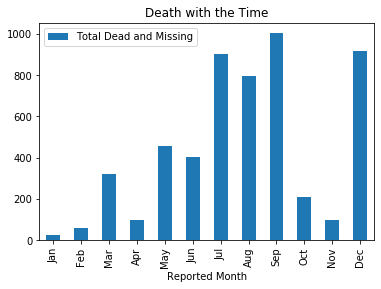

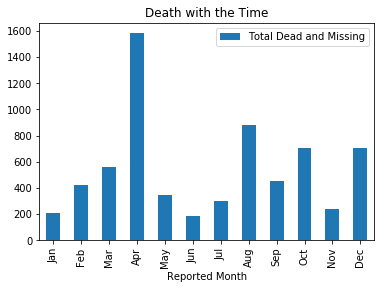

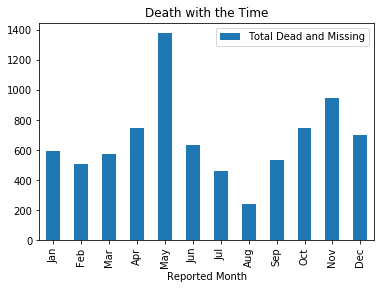

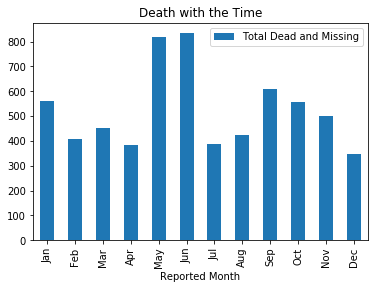

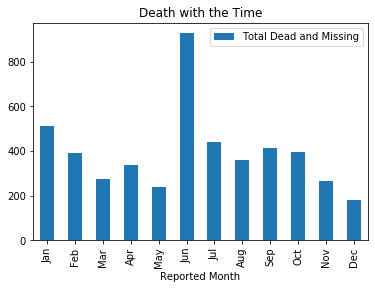

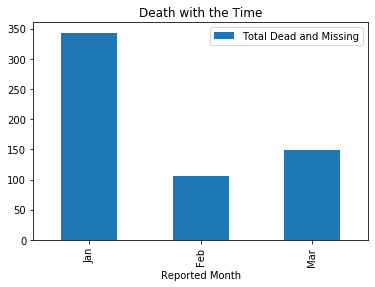

In [26]:
TimeDeath_Year[['Reported Month','Reported Year','Total Dead and Missing']].groupby('Reported Year').plot(kind = 'bar', x = 'Reported Month', y = 'Total Dead and Missing', title = 'Death with the Time', legend = True);